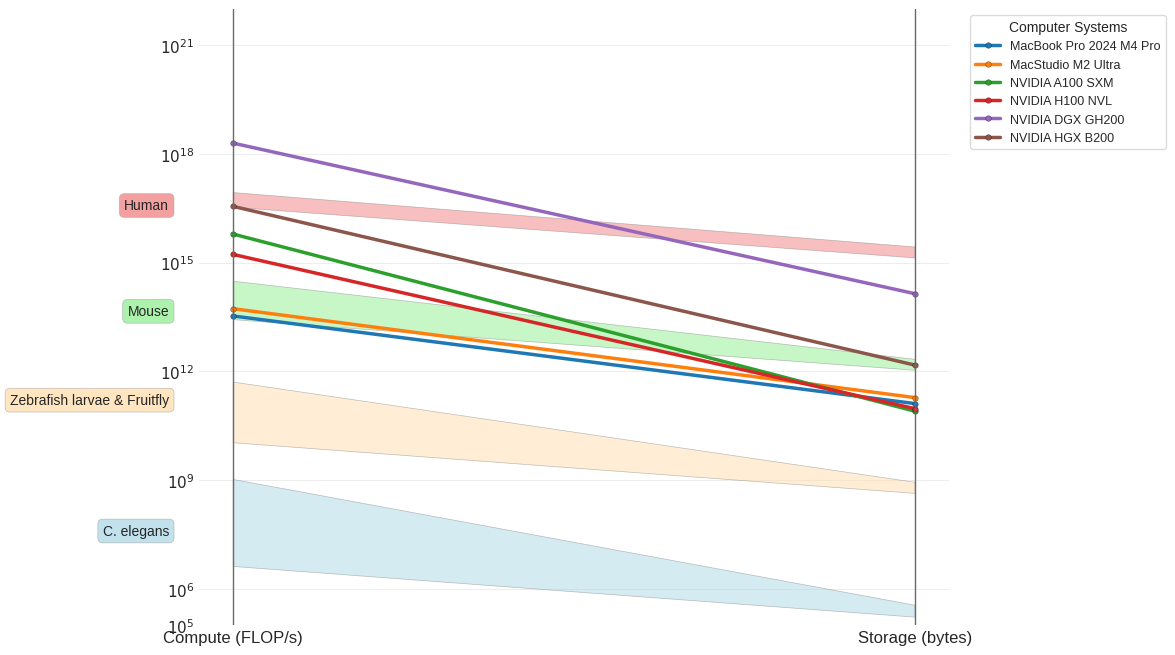

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms

from style import apply_style, save_figure, COLORS, PRIMARY_COLORS, CATEGORICAL_COLORS

apply_style()
# Data Block 1: For Computer Systems
data_block_1_raw = """
System	Year	FLOPs_TFLOPs	Memory_GB	Interconnect_GB/s	Price_USD	References	Compute‑limit (neurons)	Memory‑limit (neurons)	Interconnect‑limit (neurons)	Max neurons (all limits)	Neurons per $
MacBook Pro 2024 M4 Pro	2024	3.4E+01	1.3E+02	5.5E+11	$4,700	https://www.apple.com/macbook-pro/specs/	https://www.cpu-monkey.com/en/igpu-apple_m4_max_40_core
MacStudio M2 Ultra	2023	5.4E+01	1.9E+02	8.0E+11	$5,600	https://www.apple.com/shop/buy-mac/mac-studio/24-core-cpu-60-core-gpu-32-core-neural-engine-64gb-memory-1tb	https://www.cpu-monkey.com/en/igpu-apple_m2_ultra_76_core
NVIDIA A100 SXM	2020	6.2E+03	8.0E+01	6.0E+11	$20,000	https://www.nvidia.com/content/dam/en-zz/Solutions/Data-Center/a100/pdf/nvidia-a100-datasheet-us-nvidia-1758950-r4-web.pdf
NVIDIA H100 NVL	2023	1.7E+03	9.4E+01	3.9E+12	$25,000	https://www.nvidia.com/en-sg/data-center/h100/
NVIDA DGX GH200	2023	2.0E+06	1.4E+05	9.0E+11	$30,000,000	https://nvidianews.nvidia.com/news/nvidia-announces-dgx-gh200-ai-supercomputer
NVIDIA HGX B200	2024	3.6E+04	1.5E+03	1.4E+13	$350,000	https://www.nvidia.com/en-sg/data-center/hgx/		https://smicro.eu/nvidia-umbriel-b200-baseboard-1-5tb-hbm3e-935-26287-00a0-000-1?srsltid=AfmBOoqSSx_jIx8yjNnO1IkWY5s5JhHmEKPdSKuK5WdjEozcR0qYy3W0&utm_source=chatgpt.com
"""

# Data Block 2: For Organism event-driven bounds
data_block_2_raw = """
organisms,C. elegans (body),fly (brain),mouse (cortex),mouse (brain),human (cortex),human (brain),,,neuron models,LIF,5-comp HH,,synapse models,alpha synapse,tsodyks-markram
neurons,3.02E+02,1.40E+05,1.37E+07,7.00E+07,2.00E+10,8.60E+10,,,FLOPS per sec of sim,4.00E+04,3.45E+06,,FLOPS per sec of sim,5.00E+04,8.00E+04
synapses,2.06E+04,5.40E+07,1.20E+11,1.35E+11,1.50E+14,1.70E+14,,,FLOPS per spike,15,-,,FLOPS per event,20,51
firing (Hz),10,10,10,10,10,10,,,bytes,4.00E+00,8.00E+01,,bytes,8.00E+00,1.60E+01
spikes/s,3.02E+03,1.40E+06,1.37E+08,7.00E+08,2.00E+11,8.60E+11,,,,,,,,,
fan-in,6.82E+01,3.86E+02,8.76E+03,1.93E+03,7.50E+03,1.98E+03,,,,,,,,,
events/s,2.06E+05,5.40E+08,1.20E+12,1.35E+12,1.50E+15,1.70E+15,,,,,,,,,
timesteps/s,1.00E+04,1.00E+04,1.00E+04,1.00E+04,1.00E+04,1.00E+04,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
time-based simulation cost (per sec),C. elegans (body),fly (brain),mouse (cortex),mouse (brain),human (cortex),human (brain),,,,,,,,,
FLOPS per sec of sim (lower bound),1.04E+09,2.71E+12,6.00E+15,6.75E+15,7.50E+18,8.50E+18,,,,,,,,,
FLOPS per sec of sim (upper bound),2.69E+09,4.80E+12,9.65E+15,1.10E+16,1.21E+19,1.39E+19,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
event-driven simulation cost (per sec),C. elegans (body),fly (brain),mouse (cortex),mouse (brain),human (cortex),human (brain),,,,,,,,,
FLOPS per sec of sim (lower bound),4.16E+06,1.08E+10,2.40E+13,2.70E+13,3.00E+16,3.40E+16,,,,,,,,,
FLOPS per sec of sim (upper bound),1.05E+09,5.11E+11,1.08E+14,3.10E+14,1.46E+17,8.67E+16,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
simulation storage requirements,C. elegans (body),fly (brain),mouse (cortex),mouse (brain),human (cortex),human (brain),,,,,,,,,
bytes (lower bound),1.66E+05,4.33E+08,9.60E+11,1.08E+12,1.20E+15,1.36E+15,,,,,,,,,
bytes (upper bound),3.54E+05,8.75E+08,1.92E+12,2.17E+12,2.40E+15,2.73E+15,,,,,,,,,
"""

# 1. Parse Computer System Data
systems_df = pd.read_csv(io.StringIO(data_block_1_raw), sep='\t')
systems_to_plot_names = [
    "MacBook Pro 2024 M4 Pro", "MacStudio M2 Ultra", "NVIDIA A100 SXM",
    "NVIDIA H100 NVL", "NVIDA DGX GH200", "NVIDIA HGX B200"
]
legend_names = [
    "MacBook Pro 2024 M4 Pro", "MacStudio M2 Ultra", "NVIDIA A100 SXM",
    "NVIDIA H100 NVL", "NVIDIA DGX GH200", "NVIDIA HGX B200"
]
systems_data = []
for i, name in enumerate(systems_to_plot_names):
    row = systems_df[systems_df['System'] == name].iloc[0]
    systems_data.append({
        "name": legend_names[i],
        "compute": float(row['FLOPs_TFLOPs']) * 1e12, # TFLOPs to FLOPs
        "storage": float(row['Memory_GB']) * 1e9,      # GB to Bytes
        "color": f"C{i}"
    })

# 2. Parse Organism Data (Event-Driven)
organism_raw_data = {}
lines = data_block_2_raw.splitlines()
current_section_headers = []
for line in lines:
    parts = [p.strip() for p in line.split(',')]
    if not parts or not parts[0]: continue

    if parts[0] == 'event-driven simulation cost (per sec)':
        current_section_headers = [h for h in parts[1:] if h]
    elif parts[0] == 'FLOPS per sec of sim (lower bound)':
        for i, header_name in enumerate(current_section_headers):
            if i < len(parts) - 1 and parts[i+1]:
                if header_name not in organism_raw_data: organism_raw_data[header_name] = {}
                organism_raw_data[header_name]['compute_min'] = float(parts[i+1])
    elif parts[0] == 'FLOPS per sec of sim (upper bound)':
        for i, header_name in enumerate(current_section_headers):
            if i < len(parts) - 1 and parts[i+1]:
                if header_name not in organism_raw_data: organism_raw_data[header_name] = {}
                organism_raw_data[header_name]['compute_max'] = float(parts[i+1])
    elif parts[0] == 'simulation storage requirements':
        current_section_headers = [h for h in parts[1:] if h]
    elif parts[0] == 'bytes (lower bound)':
        for i, header_name in enumerate(current_section_headers):
            if i < len(parts) - 1 and parts[i+1]:
                if header_name not in organism_raw_data: organism_raw_data[header_name] = {}
                organism_raw_data[header_name]['storage_min'] = float(parts[i+1])
    elif parts[0] == 'bytes (upper bound)':
        for i, header_name in enumerate(current_section_headers):
            if i < len(parts) - 1 and parts[i+1]:
                if header_name not in organism_raw_data: organism_raw_data[header_name] = {}
                organism_raw_data[header_name]['storage_max'] = float(parts[i+1])

organisms_plot_data = {
    "C. elegans": {
        "compute_min": organism_raw_data['C. elegans (body)']['compute_min'],
        "compute_max": organism_raw_data['C. elegans (body)']['compute_max'],
        "storage_min": organism_raw_data['C. elegans (body)']['storage_min'],
        "storage_max": organism_raw_data['C. elegans (body)']['storage_max'],
        "color": "lightblue"
    },
    "Zebrafish larvae & Fruitfly": { # Using "fly (brain)" data
        "compute_min": organism_raw_data['fly (brain)']['compute_min'],
        "compute_max": organism_raw_data['fly (brain)']['compute_max'],
        "storage_min": organism_raw_data['fly (brain)']['storage_min'],
        "storage_max": organism_raw_data['fly (brain)']['storage_max'],
        "color": "navajowhite"
    },
    "Mouse": { # Using "mouse (brain)" data
        "compute_min": organism_raw_data['mouse (brain)']['compute_min'],
        "compute_max": organism_raw_data['mouse (brain)']['compute_max'],
        "storage_min": organism_raw_data['mouse (brain)']['storage_min'],
        "storage_max": organism_raw_data['mouse (brain)']['storage_max'],
        "color": "lightgreen"
    },
    "Human": { # Using "human (brain)" data
        "compute_min": organism_raw_data['human (brain)']['compute_min'],
        "compute_max": organism_raw_data['human (brain)']['compute_max'],
        "storage_min": organism_raw_data['human (brain)']['storage_min'],
        "storage_max": organism_raw_data['human (brain)']['storage_max'],
        "color": "lightcoral"
    }
}

original_system_colors = {
    "MacBook Pro 2024 M4 Pro": "#1f77b4", "MacStudio M2 Ultra": "#ff7f0e",
    "NVIDIA A100 SXM": "#2ca02c", "NVIDIA H100 NVL": "#d62728",
    "NVIDIA DGX GH200": "#9467bd", "NVIDIA HGX B200": "#8c564b"
}
for sys_data in systems_data:
    sys_data["color"] = original_system_colors[sys_data["name"]]

# 3 & 4. Generate the Plot
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except OSError:
    try:
        plt.style.use('seaborn-whitegrid')
    except OSError:
        pass # Use Matplotlib default

fig, ax = plt.subplots(figsize=(12, 8)) # Increased figure size for legend
x_coords = [0, 1]
axis_labels = ["Compute (FLOP/s)", "Storage (bytes)"]
ax.set_xticks(x_coords)
ax.set_xticklabels(axis_labels, fontsize=12)
ax.set_yscale('log')
ymin_plot, ymax_plot = 1e5, 1e22
ax.set_ylim(ymin_plot, ymax_plot)

# Custom formatter for y-axis ticks to show 10^X
def log_tick_formatter(val, pos=None):
    fval = float(val)
    if fval <= 0: return ""
    return f"$10^{{{int(np.round(np.log10(fval)))}}}$"
ax.yaxis.set_major_formatter(ticker.FuncFormatter(log_tick_formatter))

# Define specific powers of 10 for ticks
desired_powers = np.array([6.0, 9.0, 12.0, 15.0, 18.0, 21.0], dtype=float)
tick_values = [10**i for i in desired_powers]
if ymin_plot <= 1e5:
    is_close_to_1e6 = any(abs(np.log10(tv) - np.log10(1e5)) < 0.5 for tv in tick_values if abs(tv - 1e6) < 1e-9)
    if not tick_values or (1e5 < tick_values[0] * 0.3 and not is_close_to_1e6) or (1e5 not in tick_values) :
         tick_values.insert(0, 1e5)
tick_values_float = sorted(list(set(float(t) for t in tick_values if ymin_plot <= t <= ymax_plot)))

ax.set_yticks(np.array(tick_values_float, dtype=float))
ax.yaxis.set_minor_locator(ticker.NullLocator()) # Disable minor ticks
ax.yaxis.set_minor_formatter(ticker.NullFormatter()) # Also disable minor tick formatting

ax.tick_params(axis='y', labelsize=11)
ax.grid(True, axis='y', which='major', linestyle='-', linewidth=0.5, alpha=0.5)
ax.grid(False, axis='x')

# Transform for text placement: x in Axes fraction, y in Data units
trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)

# Plot organism bands and labels
for name, data in organisms_plot_data.items():
    polygon_x = [x_coords[0], x_coords[0], x_coords[1], x_coords[1]]
    polygon_y = [data['compute_min'], data['compute_max'], data['storage_max'], data['storage_min']]
    ax.fill(polygon_x, polygon_y, color=data['color'], alpha=0.5, edgecolor='grey', linewidth=0.5)

    clamped_cmin = max(data['compute_min'], ymin_plot)
    clamped_cmax = min(data['compute_max'], ymax_plot)
    if clamped_cmin < clamped_cmax:
        label_y_pos = np.exp((np.log(clamped_cmin) + np.log(clamped_cmax)) / 2)
    else:
        label_y_pos = np.sqrt(ymin_plot * ymax_plot)

    # Fine-tune label positions based on visual inspection of original plot
    if name == "C. elegans": label_y_pos = np.sqrt(data['compute_min'] * data['compute_max']) * 0.6
    elif name == "Zebrafish larvae & Fruitfly": label_y_pos = data['compute_min'] * 15
    elif name == "Mouse": label_y_pos = np.sqrt(data['compute_min'] * data['compute_max']) * 0.5
    elif name == "Human": label_y_pos = np.sqrt(data['compute_min'] * data['compute_max']) * 0.7

    label_y_pos = max(ymin_plot * 1.2, min(ymax_plot * 0.9, label_y_pos))

    ax.text(-0.04, label_y_pos, name, transform=trans, # x slightly more to the left
            horizontalalignment='right', verticalalignment='center', fontsize=10, fontweight='normal',
            bbox=dict(boxstyle="round,pad=0.35", fc=data['color'], alpha=0.75, ec='darkgrey', lw=0.5))

# Plot computer system lines
for sys_data in systems_data:
    ax.plot(x_coords, [sys_data['compute'], sys_data['storage']],
            label=sys_data['name'], color=sys_data['color'], marker='o', markersize=4, linewidth=2.5,
            markeredgecolor='black', markeredgewidth=0.2)

# Add legend for computer systems, outside the plot on the upper right
ax.legend(title="Computer Systems", loc='upper left', bbox_to_anchor=(1.02, 1),
          fontsize=9, frameon=True, framealpha=0.8, edgecolor='lightgrey')

# Add vertical lines for axes categories
ax.axvline(x=0, color='dimgray', linestyle='-', linewidth=1.0)
ax.axvline(x=1, color='dimgray', linestyle='-', linewidth=1.0)

# Styling: remove spines and x-axis ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', length=0)

# Adjust layout to make space for legend outside
plt.subplots_adjust(right=0.75) # Adjust right margin; may need tuning

plt.show()
# Attribution text for all figures
ATTRIBUTION = "Zanichelli, Schons et al, State of Brain Emulation Report 2025"

def add_attribution(fig=None):
    """Add attribution text to bottom right of figure."""
    import matplotlib.pyplot as plt
    if fig is None:
        fig = plt.gcf()
    fig.text(0.99, 0.01, ATTRIBUTION, 
             ha='right', va='bottom', 
             fontsize=7, color='gray', 
             style='italic',
             transform=fig.transFigure)


Plot saved as parallel_plot.svg


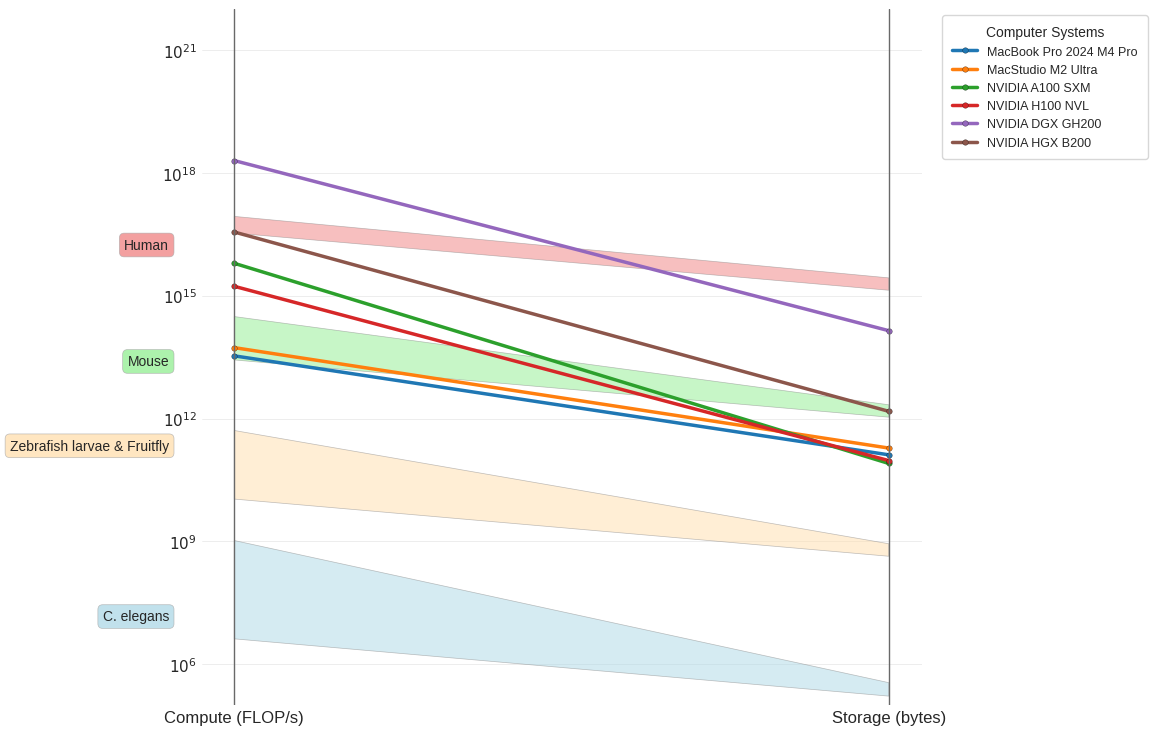

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms

from style import apply_style, save_figure, COLORS, PRIMARY_COLORS, CATEGORICAL_COLORS, GOLD, TEAL, PURPLE

apply_style()

# Data Block 1: For Computer Systems
data_block_1_raw = """
System	Year	FLOPs_TFLOPs	Memory_GB	Interconnect_GB/s	Price_USD	References	Compute‑limit (neurons)	Memory‑limit (neurons)	Interconnect‑limit (neurons)	Max neurons (all limits)	Neurons per $
MacBook Pro 2024 M4 Pro	2024	3.4E+01	1.3E+02	5.5E+11	$4,700	https://www.apple.com/macbook-pro/specs/	https://www.cpu-monkey.com/en/igpu-apple_m4_max_40_core
MacStudio M2 Ultra	2023	5.4E+01	1.9E+02	8.0E+11	$5,600	https://www.apple.com/shop/buy-mac/mac-studio/24-core-cpu-60-core-gpu-32-core-neural-engine-64gb-memory-1tb	https://www.cpu-monkey.com/en/igpu-apple_m2_ultra_76_core
NVIDIA A100 SXM	2020	6.2E+03	8.0E+01	6.0E+11	$20,000	https://www.nvidia.com/content/dam/en-zz/Solutions/Data-Center/a100/pdf/nvidia-a100-datasheet-us-nvidia-1758950-r4-web.pdf
NVIDIA H100 NVL	2023	1.7E+03	9.4E+01	3.9E+12	$25,000	https://www.nvidia.com/en-sg/data-center/h100/
NVIDA DGX GH200	2023	2.0E+06	1.4E+05	9.0E+11	$30,000,000	https://nvidianews.nvidia.com/news/nvidia-announces-dgx-gh200-ai-supercomputer
NVIDIA HGX B200	2024	3.6E+04	1.5E+03	1.4E+13	$350,000	https://www.nvidia.com/en-sg/data-center/hgx/		https://smicro.eu/nvidia-umbriel-b200-baseboard-1-5tb-hbm3e-935-26287-00a0-000-1?srsltid=AfmBOoqSSx_jIx8yjNnO1IkWY5s5JhHmEKPdSKuK5WdjEozcR0qYy3W0&utm_source=chatgpt.com
"""

# Data Block 2: For Organism event-driven bounds
data_block_2_raw = """
organisms,C. elegans (body),fly (brain),mouse (cortex),mouse (brain),human (cortex),human (brain),,,neuron models,LIF,5-comp HH,,synapse models,alpha synapse,tsodyks-markram
neurons,3.02E+02,1.40E+05,1.37E+07,7.00E+07,2.00E+10,8.60E+10,,,FLOPS per sec of sim,4.00E+04,3.45E+06,,FLOPS per sec of sim,5.00E+04,8.00E+04
synapses,2.06E+04,5.40E+07,1.20E+11,1.35E+11,1.50E+14,1.70E+14,,,FLOPS per spike,15,-,,FLOPS per event,20,51
firing (Hz),10,10,10,10,10,10,,,bytes,4.00E+00,8.00E+01,,bytes,8.00E+00,1.60E+01
spikes/s,3.02E+03,1.40E+06,1.37E+08,7.00E+08,2.00E+11,8.60E+11,,,,,,,,,
fan-in,6.82E+01,3.86E+02,8.76E+03,1.93E+03,7.50E+03,1.98E+03,,,,,,,,,
events/s,2.06E+05,5.40E+08,1.20E+12,1.35E+12,1.50E+15,1.70E+15,,,,,,,,,
timesteps/s,1.00E+04,1.00E+04,1.00E+04,1.00E+04,1.00E+04,1.00E+04,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
time-based simulation cost (per sec),C. elegans (body),fly (brain),mouse (cortex),mouse (brain),human (cortex),human (brain),,,,,,,,,
FLOPS per sec of sim (lower bound),1.04E+09,2.71E+12,6.00E+15,6.75E+15,7.50E+18,8.50E+18,,,,,,,,,
FLOPS per sec of sim (upper bound),2.69E+09,4.80E+12,9.65E+15,1.10E+16,1.21E+19,1.39E+19,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
event-driven simulation cost (per sec),C. elegans (body),fly (brain),mouse (cortex),mouse (brain),human (cortex),human (brain),,,,,,,,,
FLOPS per sec of sim (lower bound),4.16E+06,1.08E+10,2.40E+13,2.70E+13,3.00E+16,3.40E+16,,,,,,,,,
FLOPS per sec of sim (upper bound),1.05E+09,5.11E+11,1.08E+14,3.10E+14,1.46E+17,8.67E+16,,,,,,,,,
,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,
simulation storage requirements,C. elegans (body),fly (brain),mouse (cortex),mouse (brain),human (cortex),human (brain),,,,,,,,,
bytes (lower bound),1.66E+05,4.33E+08,9.60E+11,1.08E+12,1.20E+15,1.36E+15,,,,,,,,,
bytes (upper bound),3.54E+05,8.75E+08,1.92E+12,2.17E+12,2.40E+15,2.73E+15,,,,,,,,,
"""

# 1. Parse Computer System Data
systems_df = pd.read_csv(io.StringIO(data_block_1_raw), sep='\t')
systems_to_plot_names = ["MacBook Pro 2024 M4 Pro", "MacStudio M2 Ultra", "NVIDIA A100 SXM", "NVIDIA H100 NVL", "NVIDA DGX GH200", "NVIDIA HGX B200"]
legend_names = ["MacBook Pro 2024 M4 Pro", "MacStudio M2 Ultra", "NVIDIA A100 SXM", "NVIDIA H100 NVL", "NVIDIA DGX GH200", "NVIDIA HGX B200"]
systems_data = []
for i, name in enumerate(systems_to_plot_names):
    row = systems_df[systems_df['System'] == name].iloc[0]
    systems_data.append({
        "name": legend_names[i], "compute": float(row['FLOPs_TFLOPs']) * 1e12,
        "storage": float(row['Memory_GB']) * 1e9, "color": f"C{i}"})

# 2. Parse Organism Data (Event-Driven)
organism_raw_data = {}
lines = data_block_2_raw.splitlines()
current_section_headers = []
for line in lines:
    parts = [p.strip() for p in line.split(',')]
    if not parts or not parts[0]: continue
    if parts[0] == 'event-driven simulation cost (per sec)': current_section_headers = [h for h in parts[1:] if h]
    elif parts[0] == 'FLOPS per sec of sim (lower bound)':
        for i, header_name in enumerate(current_section_headers):
            if i < len(parts) - 1 and parts[i+1]:
                if header_name not in organism_raw_data: organism_raw_data[header_name] = {}
                organism_raw_data[header_name]['compute_min'] = float(parts[i+1])
    elif parts[0] == 'FLOPS per sec of sim (upper bound)':
        for i, header_name in enumerate(current_section_headers):
            if i < len(parts) - 1 and parts[i+1]: organism_raw_data[header_name]['compute_max'] = float(parts[i+1])
    elif parts[0] == 'simulation storage requirements': current_section_headers = [h for h in parts[1:] if h]
    elif parts[0] == 'bytes (lower bound)':
        for i, header_name in enumerate(current_section_headers):
            if i < len(parts) - 1 and parts[i+1]:
                if header_name not in organism_raw_data: organism_raw_data[header_name] = {}
                organism_raw_data[header_name]['storage_min'] = float(parts[i+1])
    elif parts[0] == 'bytes (upper bound)':
        for i, header_name in enumerate(current_section_headers):
            if i < len(parts) - 1 and parts[i+1]: organism_raw_data[header_name]['storage_max'] = float(parts[i+1])

organisms_plot_data = {
    "C. elegans": {"compute_min": organism_raw_data['C. elegans (body)']['compute_min'], "compute_max": organism_raw_data['C. elegans (body)']['compute_max'], "storage_min": organism_raw_data['C. elegans (body)']['storage_min'], "storage_max": organism_raw_data['C. elegans (body)']['storage_max'], "color": TEAL},
    "Zebrafish larvae & Fruitfly": {"compute_min": organism_raw_data['fly (brain)']['compute_min'], "compute_max": organism_raw_data['fly (brain)']['compute_max'], "storage_min": organism_raw_data['fly (brain)']['storage_min'], "storage_max": organism_raw_data['fly (brain)']['storage_max'], "color": GOLD},
    "Mouse": {"compute_min": organism_raw_data['mouse (brain)']['compute_min'], "compute_max": organism_raw_data['mouse (brain)']['compute_max'], "storage_min": organism_raw_data['mouse (brain)']['storage_min'], "storage_max": organism_raw_data['mouse (brain)']['storage_max'], "color": CATEGORICAL_COLORS[4]},
    "Human": {"compute_min": organism_raw_data['human (brain)']['compute_min'], "compute_max": organism_raw_data['human (brain)']['compute_max'], "storage_min": organism_raw_data['human (brain)']['storage_min'], "storage_max": organism_raw_data['human (brain)']['storage_max'], "color": PRIMARY_COLORS[2]}}
original_system_colors = {"MacBook Pro 2024 M4 Pro": CATEGORICAL_COLORS[0], "MacStudio M2 Ultra": CATEGORICAL_COLORS[1], "NVIDIA A100 SXM": CATEGORICAL_COLORS[2], "NVIDIA H100 NVL": GOLD, "NVIDIA DGX GH200": PRIMARY_COLORS[0], "NVIDIA HGX B200": PRIMARY_COLORS[1]}
for sys_data in systems_data: sys_data["color"] = original_system_colors[sys_data["name"]]

# 3 & 4. Generate the Plot
try: plt.style.use('seaborn-v0_8-whitegrid')
except OSError:
    try: plt.style.use('seaborn-whitegrid')
    except OSError: pass

fig, ax = plt.subplots(figsize=(12, 8))
x_coords = [0.3, 0.7] # Moved axes closer
axis_labels = ["Compute (FLOP/s)", "Storage (bytes)"]
ax.set_xticks(x_coords); ax.set_xticklabels(axis_labels, fontsize=12)
ax.set_yscale('log'); ymin_plot, ymax_plot = 1e5, 1e22; ax.set_ylim(ymin_plot, ymax_plot)

def log_tick_formatter(val, pos=None):
    fval = float(val);
    if fval <= 0: return ""
    return f"$10^{{{int(np.round(np.log10(fval)))}}}$"
ax.yaxis.set_major_formatter(ticker.FuncFormatter(log_tick_formatter))

# Start desired_powers from 6.0 to remove 10^5 tick
desired_powers = np.array([6.0, 9.0, 12.0, 15.0, 18.0, 21.0], dtype=float)
tick_values = [10**i for i in desired_powers]
tick_values_float = sorted(list(set(float(t) for t in tick_values if ymin_plot <= t <= ymax_plot)))

ax.set_yticks(np.array(tick_values_float, dtype=float))
ax.yaxis.set_minor_locator(ticker.NullLocator())
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.tick_params(axis='y', labelsize=11); ax.grid(True, axis='y', which='major', linestyle='-', linewidth=0.5, alpha=0.5); ax.grid(False, axis='x')
trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
for name, data in organisms_plot_data.items():
    ax.fill([x_coords[0], x_coords[0], x_coords[1], x_coords[1]], [data['compute_min'], data['compute_max'], data['storage_max'], data['storage_min']], color=data['color'], alpha=0.5, edgecolor='grey', linewidth=0.5)
    clamped_cmin = max(data['compute_min'], ymin_plot); clamped_cmax = min(data['compute_max'], ymax_plot)
    if clamped_cmin < clamped_cmax:
        label_y_pos = np.exp((np.log(clamped_cmin) + np.log(clamped_cmax)) / 2)
    else:
        label_y_pos = np.sqrt(ymin_plot * ymax_plot)

    # Adjust label y-positions for clarity (may need further fine-tuning)
    if name == "C. elegans": label_y_pos = data['compute_min'] * 3.5 if data['compute_min'] > 1e5 else 1e6 # Adjust if too low
    elif name == "Zebrafish larvae & Fruitfly": label_y_pos = data['compute_min'] * 20
    elif name == "Mouse": label_y_pos = data['compute_max'] * 0.08
    elif name == "Human": label_y_pos = data['compute_max'] * 0.2

    label_y_pos = max(ymin_plot * 1.5, min(ymax_plot * 0.85, label_y_pos)) # Ensure visibility

    ax.text(-0.045, label_y_pos, name, transform=trans, ha='right', va='center', fontsize=10, fontweight='normal', bbox=dict(boxstyle="round,pad=0.35", fc=data['color'], alpha=0.75, ec='darkgrey', lw=0.5))
for sys_data in systems_data:
    ax.plot(x_coords, [sys_data['compute'], sys_data['storage']], label=sys_data['name'], color=sys_data['color'], marker='o', markersize=4, linewidth=2.5, markeredgecolor='black', markeredgewidth=0.2)

# Legend outside the plot on the upper right
ax.legend(title="Computer Systems", loc='upper left', bbox_to_anchor=(1.02, 1.0),
          fontsize=9, frameon=True, framealpha=0.9, edgecolor='lightgrey', borderpad=0.8)

ax.axvline(x=x_coords[0], color='dimgray', linestyle='-', linewidth=1.0)
ax.axvline(x=x_coords[1], color='dimgray', linestyle='-', linewidth=1.0)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False); ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', length=0)

# Adjust layout to make space for legend. `tight_layout` is avoided.
plt.subplots_adjust(left=0.1, right=0.70, top=0.95, bottom=0.08) # Tune these values


save_figure(fig, "computational-demands-organisms")


# If you also want to display it in Colab after saving:
plt.show()